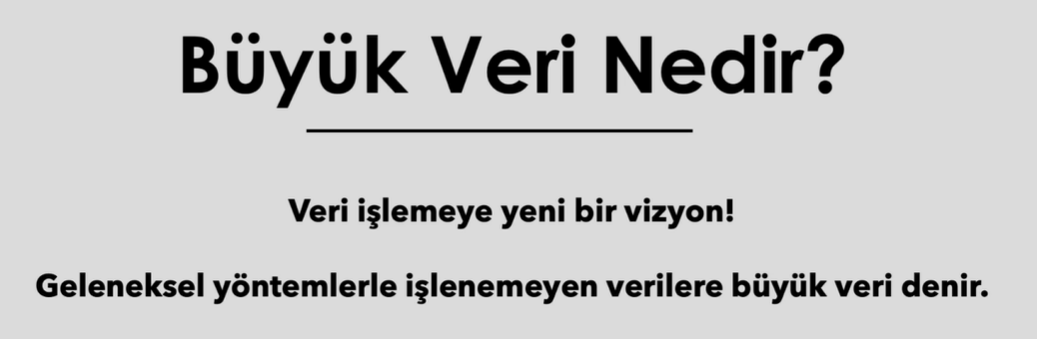

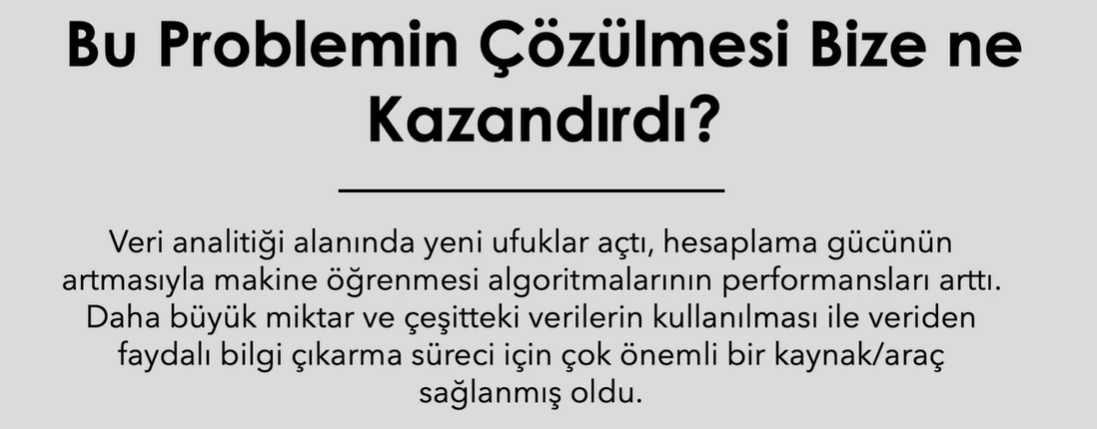

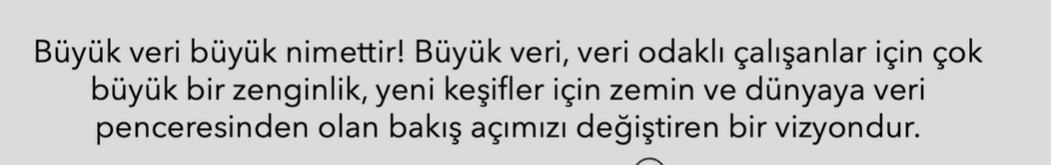

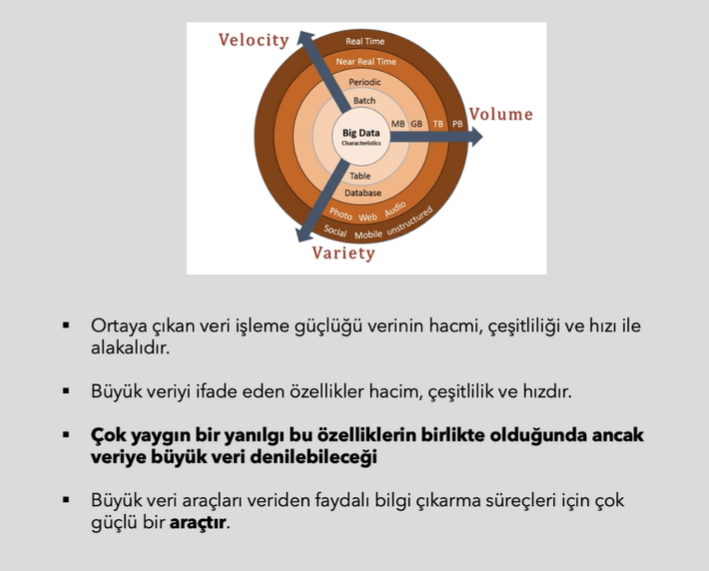

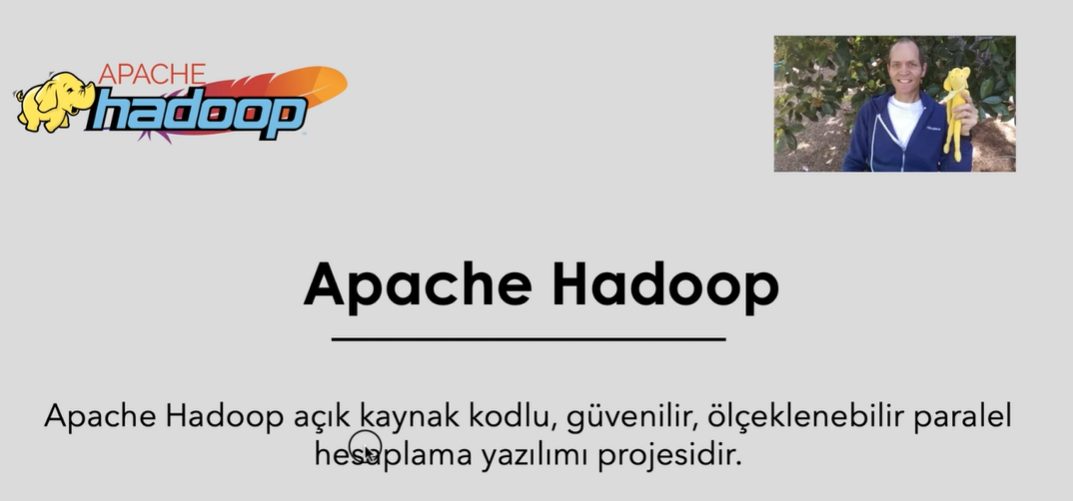

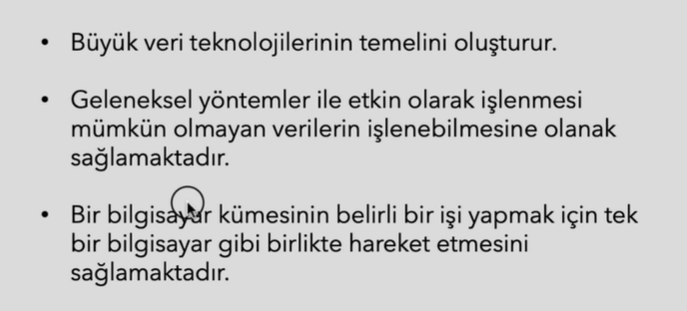

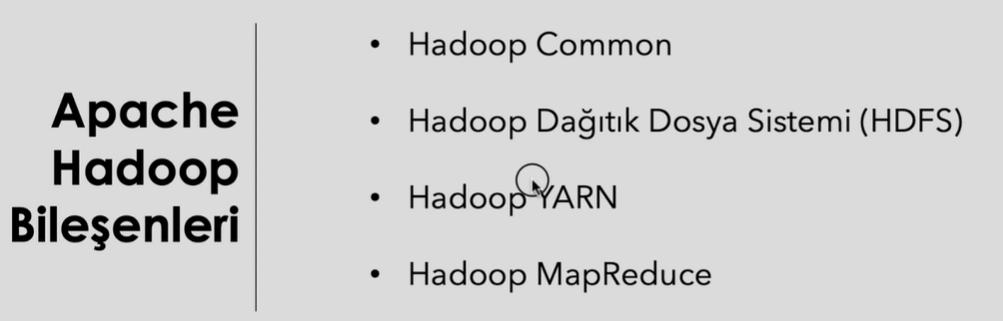

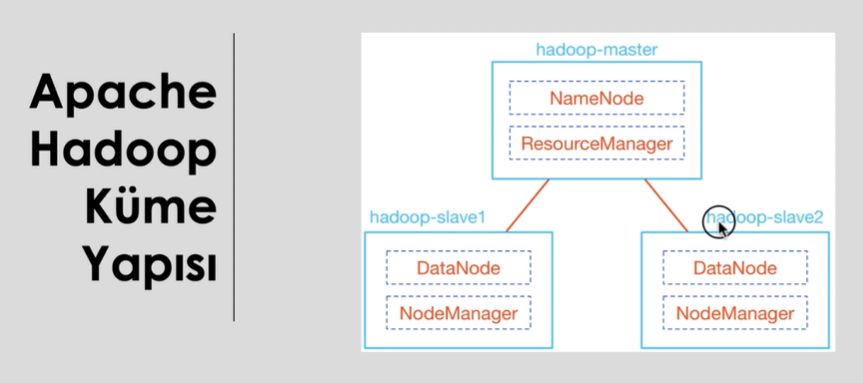

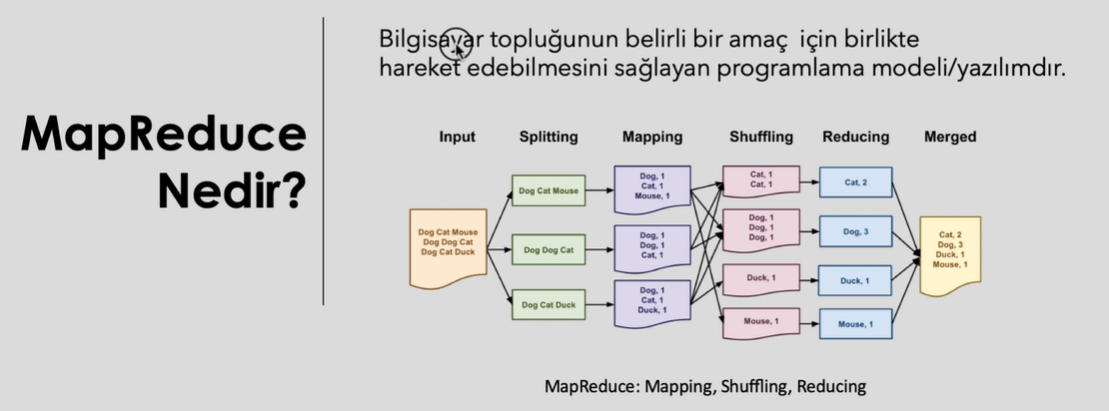

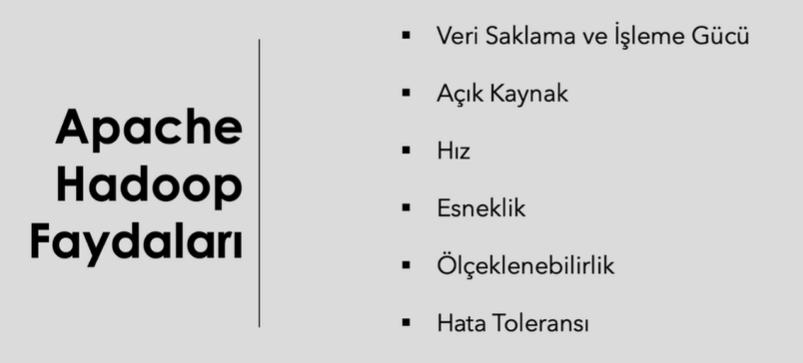

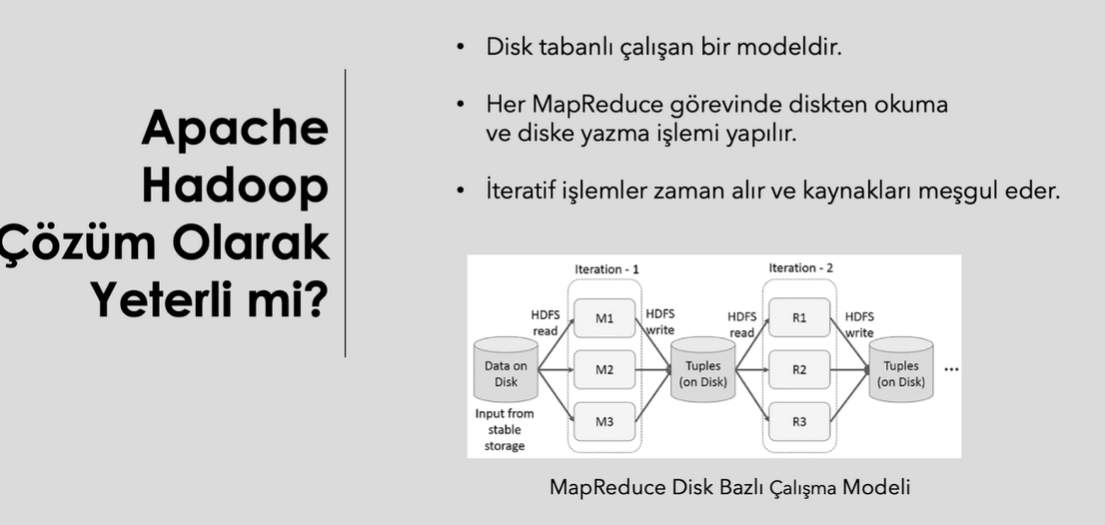

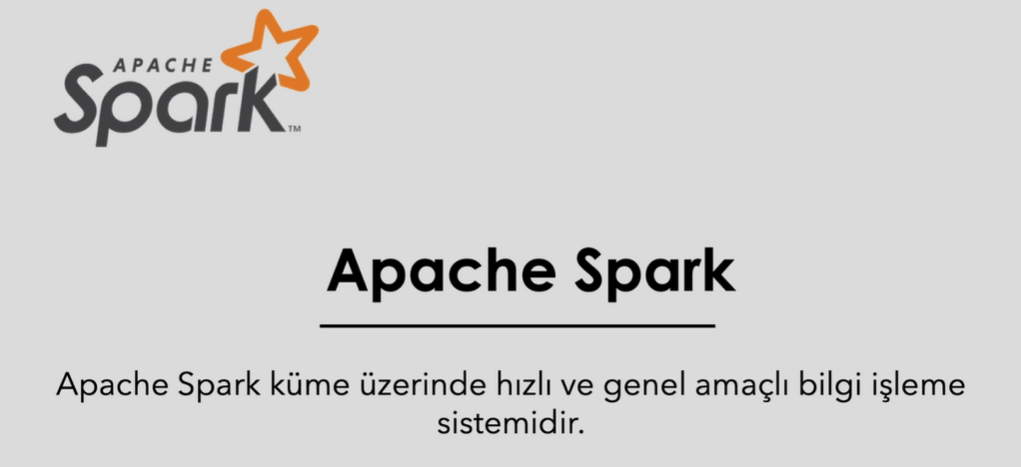

In [ ]:
Apache Hadoop mapreduce parametresi üzerine kurulan bir uygulamadır.

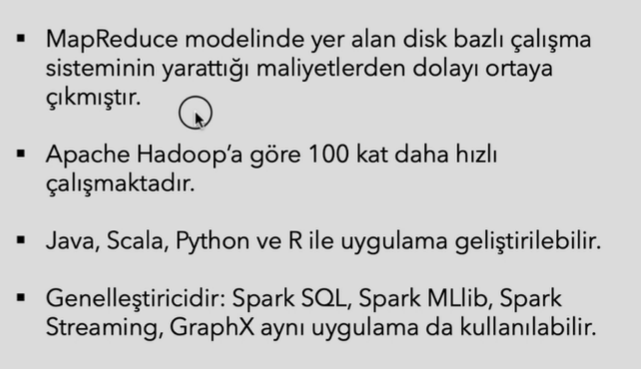

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
!pip install findspark

In [ ]:
import pyspark
from pyspark import SparkContext

In [ ]:
import findspark
findspark.init("/Users/mvahit/spark/spark-2.4.2-bin-hadoop2.7")

In [ ]:
import pyspark
from pyspark import SparkContext

# Configurasyon ve Spark Bağlantısı 

In [ ]:
from pyspark import SparkContext
sc = SparkContext(master = "local")
sc

In [ ]:
sc.version

In [ ]:
sc.sparkUser()

In [ ]:
sc.appName

In [ ]:
dir(sc)

In [ ]:
sc.stop()

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_uygulama") \
    .config("spark.executer.memory", "16gb") \
    .getOrCreate()



sc = spark.sparkContext
sc

# Temel DataFrame İşlemleri

In [ ]:
spark_df = spark.read.csv("diabetes.csv", header = True, inferSchema = True)

In [ ]:
spark_df.printSchema()

In [ ]:
type(spark_df)

In [ ]:
spark_df.cache()

In [ ]:
type(spark_df)

In [ ]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])

In [ ]:
type(df)

In [ ]:
df.head()

In [ ]:
spark_df.head()

In [ ]:
df.dtypes

In [ ]:
spark_df.dtypes

In [ ]:
df.ndim

In [ ]:
spark_df.size

In [ ]:
spark_df.show(2)

In [ ]:
spark_df.count()

In [ ]:
len(spark_df.columns)

In [ ]:
spark_df.describe().show()

In [ ]:
#degisken secme

In [ ]:
spark_df.describe("Glucose").show()

In [ ]:
spark_df.select("Glucose","Pregnancies").show(5)

In [ ]:
spark_df.select("Glucose").distinct().count()

In [ ]:
spark_df.select("Glucose").dropDuplicates().count()

In [ ]:
spark_df.crosstab("Outcome","Pregnancies").show()

In [ ]:
spark_df.dropna().show(3)

In [ ]:
#gozlem secme

In [ ]:
spark_df.filter(spark_df.Age >40).count()

In [ ]:
spark_df.groupby("Outcome").count().show()

In [ ]:
spark_df.groupby("Outcome").agg({"BMI": "mean"}).show()

In [ ]:
spark_df.withColumn("yeni_degisken", spark_df.BMI / 2).select("BMI","yeni_degisken").show(5)

In [ ]:
spark_df.withColumnRenamed("Outcome","bagimli_degisken").columns

In [ ]:
spark_df.show(3)

In [ ]:
spark_df.drop("Insulin").columns

In [ ]:
a = spark_df.groupby("Outcome").count().toPandas()

In [ ]:
a

In [ ]:
a.iloc[1,1]

# SQL İşlemleri

In [ ]:
sc

In [ ]:
spark_df.registerTempTable("table_df")

In [ ]:
spark.sql("show databases").show()

In [ ]:
spark.sql("show tables").show()

In [ ]:
spark.sql("select Glucose from table_df").show(5)

In [ ]:
spark.sql("select Outcome, mean(Glucose) from table_df group by Outcome").show(5)

# Büyük Veri Görselleştirme

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.barplot(x = "Outcome", y = spark_df.Outcome.index, data = spark_df)

In [ ]:
sdf = spark_df.toPandas()
sdf.head()

In [ ]:
sns.barplot(x = "Outcome", y = sdf.Outcome.index, data = sdf)

# Uçtan Büyük Veride Makine Öğrenmesi

## Spark Session ve Veri Seti

In [ ]:
sc.stop()

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("churn_modellemesi") \
    .config("spark.executer.memory", "16gb") \
    .getOrCreate()



sc = spark.sparkContext
sc

In [ ]:
spark_df = spark.read.csv("churn.csv", 
                          header = True, 
                          inferSchema = True,
                          sep = ",")
spark_df.cache()

In [ ]:
spark_df.printSchema()

In [ ]:
spark_df.show(5)

In [ ]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])

In [ ]:
spark_df.show(5)

In [ ]:
#df.columns = map(str.lower, df.columns)

In [ ]:
spark_df = spark_df.withColumnRenamed("_c0", "index")

In [ ]:
spark_df.show(2)

In [ ]:
spark_df.count()

In [ ]:
len(spark_df.columns)

In [ ]:
spark_df.columns

In [ ]:
spark_df.distinct().count()

In [ ]:
spark_df.select("names").distinct().count()

In [ ]:
spark_df.groupby("names").count().sort("count", ascending = False).show(3)

In [ ]:
spark_df.filter(spark_df.names == "Jennifer Wood").show()

In [ ]:
spark_df.select("names").dropDuplicates().groupBy("names").count().sort("count",ascending = False).show(3)

In [ ]:
spark_df.where(spark_df.index == 439).select("names").show()

In [ ]:
jen = spark_df.where(spark_df.index == 439).collect()[0]["names"]

In [ ]:
type(jen)

In [ ]:
dir(jen)

In [ ]:
jen.upper()

## Keşifçi Veri Analizi

In [ ]:
print(spark_df.describe().show())

In [ ]:
spark_df.select("age","total_purchase", "account_manager", "years","num_sites","churn").describe().toPandas().transpose()

In [ ]:
spark_df.filter(spark_df.age > 47).count()

In [ ]:
spark_df.groupby("churn").count().show()

In [ ]:
spark_df.groupby("churn").agg({"total_purchase": "mean"}).show()

In [ ]:
spark_df.groupby("churn").agg({"years": "mean"}).show()

In [ ]:
kor_data = spark_df.drop("index","names").toPandas()

In [ ]:
import seaborn as sns
sns.pairplot(kor_data, hue = "churn");

In [ ]:
sns.pairplot(kor_data, vars = ["age", "total_purchase","years","num_sites"], 
             hue = "churn",
            kind = "reg");

## Veri Ön İşleme

In [ ]:
spark_df = spark_df.dropna()

In [ ]:
spark_df = spark_df.withColumn("age_kare", spark_df.age**2)

In [ ]:
spark_df.show(3)

In [ ]:
from pyspark.ml.feature import StringIndexer

stringIndexer = StringIndexer(inputCol = "churn", outputCol = "label")

In [ ]:
?stringIndexer

In [ ]:
indexed = stringIndexer.fit(spark_df).transform(spark_df)

In [ ]:
indexed.dtypes

In [ ]:
spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))

In [ ]:
spark_df.dtypes

In [ ]:
#bagimsiz degiskenlerin ayarlanmasi

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
spark_df.columns

In [ ]:
bag = ["age","total_purchase", "account_manager","years","num_sites"]

In [ ]:
vectorAssembler = VectorAssembler(inputCols = bag, outputCol = "features")

In [ ]:
va_df = vectorAssembler.transform(spark_df)

In [ ]:
final_df = va_df.select(["features","label"])

In [ ]:
final_df.show()

## Test-train

In [ ]:
splits = final_df.randomSplit([0.7,0.3])
train_df = splits[0]
test_df = splits[1]

In [ ]:
train_df

In [ ]:
test_df

# GBM ile Müşteri Terk Modellemesi

In [ ]:
from pyspark.ml.classification import GBTClassifier

In [ ]:
gbm = GBTClassifier(maxIter = 10, featuresCol = "features", labelCol = "label")

In [ ]:
gbm_model = gbm.fit(train_df)

In [ ]:
y_pred = gbm_model.transform(test_df)

In [ ]:
y_pred

In [ ]:
ac = y_pred.select("label","prediction")

In [ ]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
             .addGrid(gbm.maxDepth, [2, 4, 6])
             .addGrid(gbm.maxBins, [20, 30])
             .addGrid(gbm.maxIter, [10, 20])
             .build())

cv = CrossValidator(estimator= gbm, estimatorParamMaps = paramGrid, evaluator=evaluator, numFolds= 10)

In [ ]:
cv_model = cv.fit(train_df)

In [ ]:
y_pred = cv_model.transform(test_df)
ac = y_pred.select("label","prediction")

In [ ]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

In [ ]:
evaluator.evaluate(y_pred)

## Bu müşteriler bizi terk eder mi?

In [ ]:
import pandas as pd
names = pd.Series(["Ali Ahmetoğlu", "Berkcan Tanerbey", "Harika Gündüz","Polat Alemdar", "Ata Bakmayan Ali"])
age = pd.Series([38, 43, 34, 50, 40])
total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20, 10, 3, 8, 30])
num_sites = pd.Series([30,8,8,6,50])


yeni_musteriler = pd.DataFrame({
    'names':names,
    'age': age,
    'total_purchase': total_purchase,
    'account_manager': account_manager ,
    'years': years,
    'num_sites': num_sites})

yeni_musteriler.columns

In [ ]:
yeni_musteriler

In [ ]:
yeni_sdf = spark.createDataFrame(yeni_musteriler)

In [ ]:
type(yeni_sdf)

In [ ]:
yeni_sdf.show()

In [ ]:
yeni_musteriler = vectorAssembler.transform(yeni_sdf)

In [ ]:
sonuclar = cv_model.transform(yeni_musteriler)

In [ ]:
sonuclar.select("names","prediction").show()

## Diğer Bazı Modeller

In [ ]:
from pyspark.ml.classification import LogisticRegression
loj = LogisticRegression(featuresCol = "features", labelCol = 'label', maxIter=10)
loj_model = loj.fit(train_df)
y_pred = loj_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dt_model = dt.fit(train_df)
y_pred = dt_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rf_model = rf.fit(train_df)
y_pred = rf_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()